## Setup

In [ ]:
# install required packages
!pip install -q openai langchain chromadb faiss-cpu pypdf tiktoken docarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 5.8 MB/s eta 0

In [ ]:
# install the necessary library for working with pdf
!pip install PyPDF

In [ ]:
# Installing tiktoken library for working with OpenAI's embedding model
!pip install tiktoken

In [ ]:
# install the ChatOpenAI model
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.1/420.1 kB 10.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive;
drive.mount('/content/drive')

Mounted at /content/drive


## Set the OpenAI Key

In [ ]:
# import the necessary libraies
import os
import openai

folder_path = '/content/drive/MyDrive/GenAI Revamp - 2025/GenAI for DS/'
os.chdir(folder_path)

#"/content/drive/MyDrive/GenAI Revamp - 2025/GenAI for DS/MY_API_KEY.txt"
# Read the text file containing the API key
#with open(folder_path + "OpenAI_API_Key.txt", "r") as f:
with open("/content/drive/MyDrive/GenAI Revamp - 2025/GenAI for DS/MY_API_KEY.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

# Update the OpenAI API key by updating the environment variable
os.environ["OPENAI_API_KEY"] = openai.api_key

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LangChain**

The LangChain framework revolves around the following building blocks:
* Model I/O: Interface with language models (LLMs & Chat Models, Prompts, Output Parsers)
* Retrieval: Interface with application-specific data (Document loaders, Document transformers, Text embedding models, Vector stores, Retrievers)
* Chains: Construct sequences/chains of LLM calls
* Memory: Persist application state between runs of a chain
* Agents: Let chains choose which tools to use given high-level directives
* Callbacks: Log and stream intermediate steps of any chain



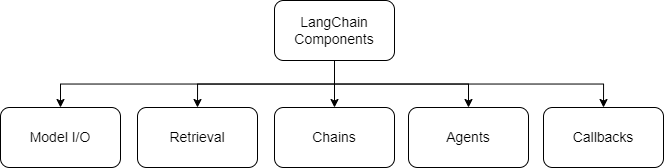

# 1. Model I/O


LangChain's Model I/O component provides support to interface with the LLM and generate responses.
The Model I/O consists of:
* **Language Models**: Make calls to language models through common interfaces
* **Prompts**: Templatize, dynamically select, and manage model inputs
* **Output Parsers**: Extract information from model outputs

The general flow of Model I/O in LangChain is illustrated in the image below ([source](https://python.langchain.com/docs/modules/model_io/)).

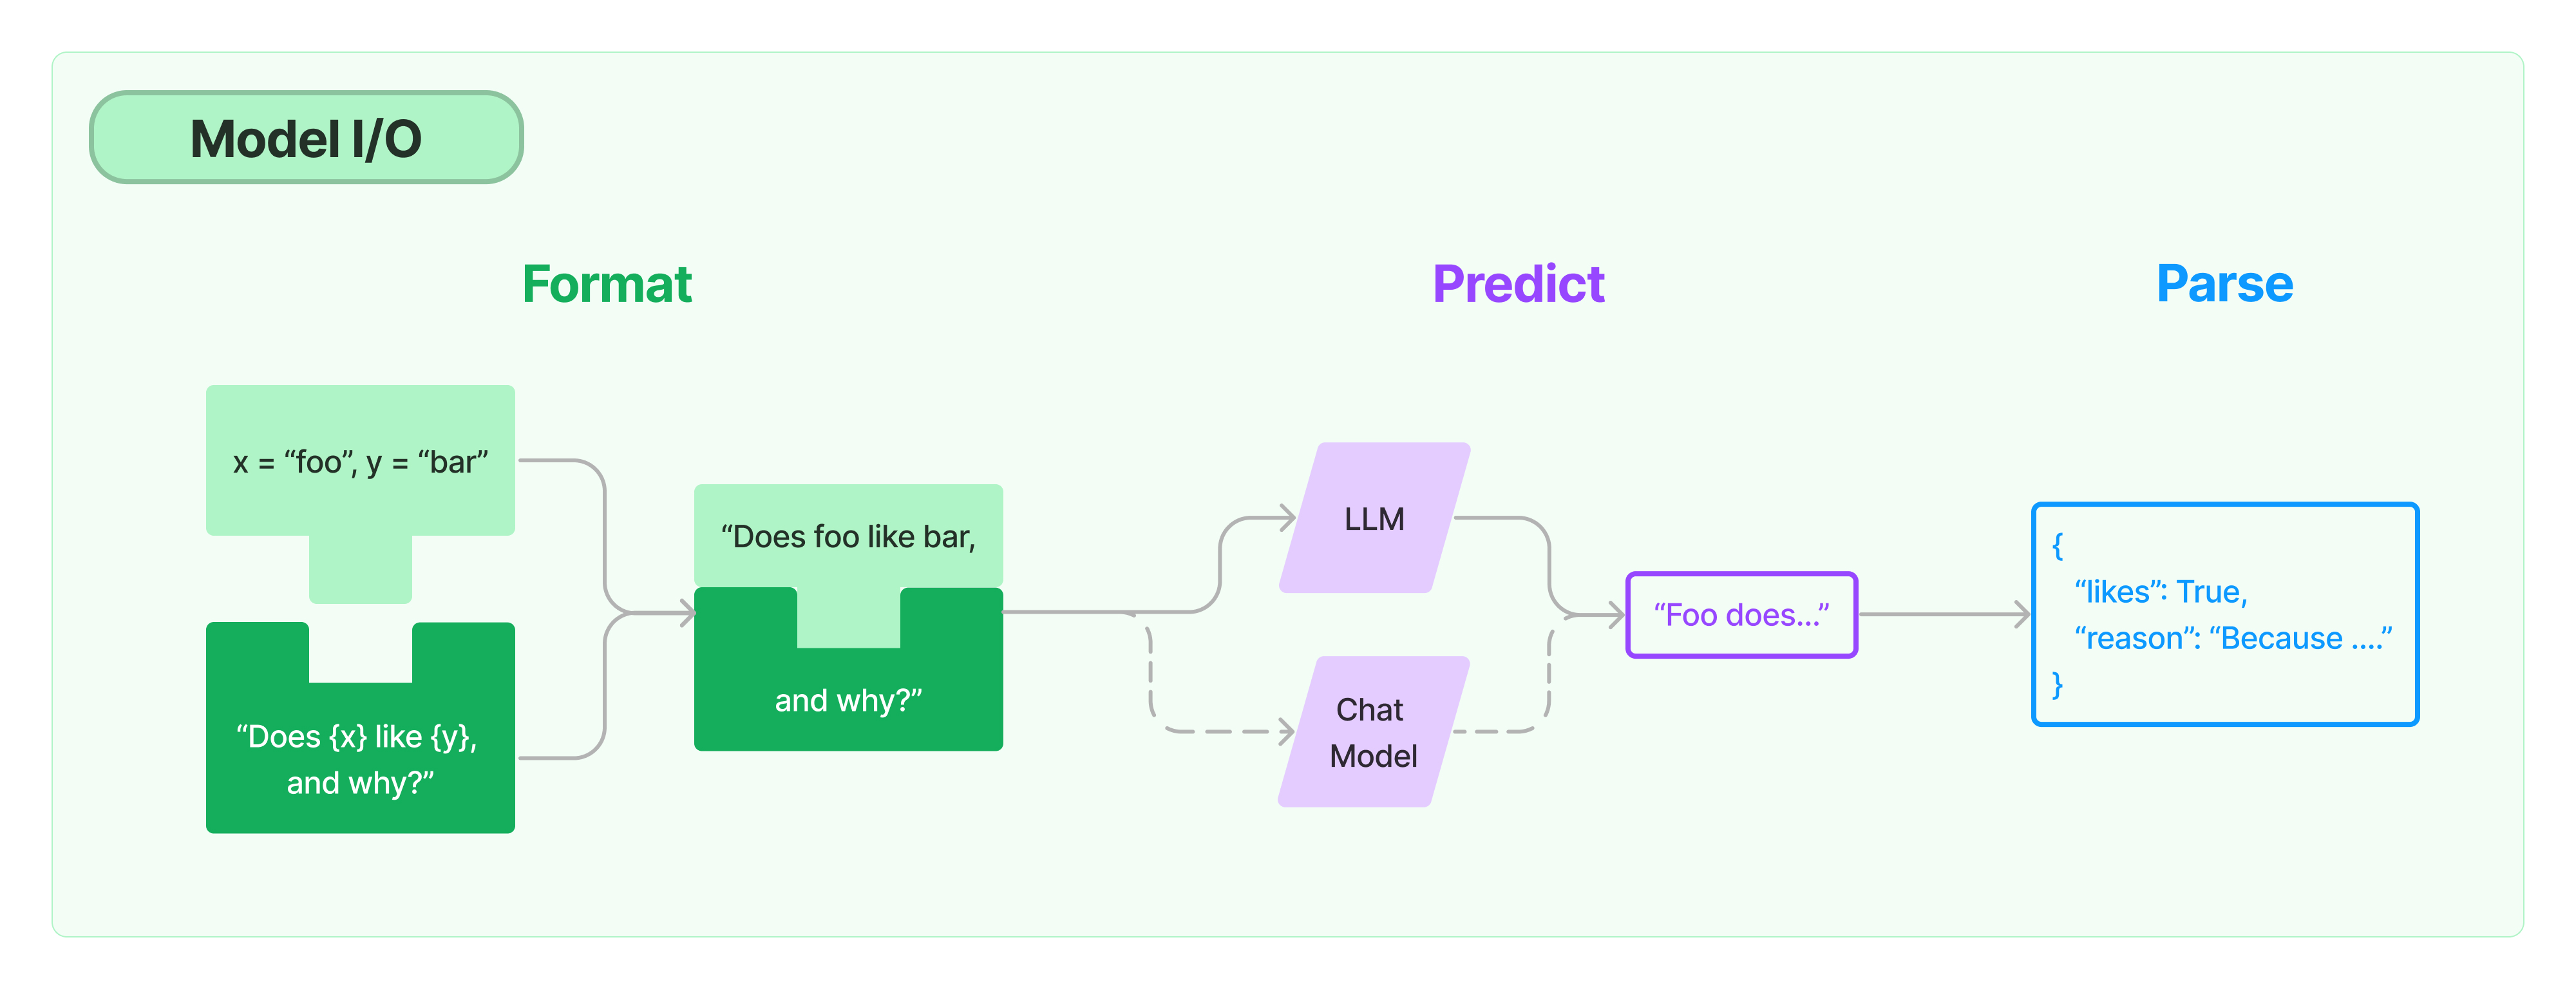

## Model


LangChain provides an easy out-of-the box support to work with LLMs. LangChain provides interfaces and integrations for two classes of LLM models
*   **LLMs**: Models that take a text string as input and return a text string
*   **Chat models**: Models that are backed by a language model but take a list of Chat Messages as input and return a Chat Message.

LLMs and chat models are subtly but importantly different. LLMs in LangChain refer to pure `text completion models` - where a string prompt is taken as the input and the LLM outputs a string.

Chat Models are LLMs that have been tuned specifically for having turn-based conversations such as ChatGPT. Instead of a single string, they take a list of chat messages as input. Usually these models have labelled messages such as "System", "Human" and provides a AI chat message ("AI"/ "Output Response") as the output.




###  **[LLMs](https://python.langchain.com/docs/modules/model_io/models/llms/)**


The `LLM` class of LangChain is designed to provide a standard interface for all the major LLM provides such as OpenAI, Cohere, Hugging Face, etc.
LangChain provided a standard interface for interacting with many different LLMs to perform  standard text completion tasks.

This, however, has been deprecated and no longer is supported by LangChain. The text completion model is now categorised as `legacy` by OpenAI hence for the remainder of the course, we will work with OpenAI's chat model.



###  **[Chat Model](https://python.langchain.com/docs/modules/model_io/models/chat/)**

Chat models are a variation on language models. While chat models use language models under the hood, the interface they use is a bit different. Rather than using a "text in, text out" API, they use an interface where "chat messages" are the inputs and outputs.

The OpenAI chat model can be imported using the code below:
```
pip install -qU langchain-openai
from langchain_openai import ChatOpenAI
```
There are two ways to initiate the OpenAI LLM class once the necessary libraries have been imported.
If you'd prefer not to set an environment variable you can pass the key in directly via the openai_api_key named parameter when initiating the OpenAI LLM class:
```
chat = ChatOpenAI(openai_api_key="...")
```
Otherwise you can initialize without any params:
```
from langchain_openai import ChatOpenAI
chat = ChatOpenAI()
```

In [ ]:
# import required libraries
from langchain_openai import ChatOpenAI, OpenAI

# instantiate OpenAI's Chat Model
llm_chat = ChatOpenAI()

The ChatOpenAI() can take multiple arguments. The API reference contains the complete list of arguments that can be passed to the chat model. A few important ones include:
* max_tokens
* model_name:  If not defined, the default model is `gpt-3.5-turbo`
* max_retries: If not defined, the default value is 6
* temperature: If not defined, the default value `temperature = 0.7`


# 2. Data Connections and Retrieval

In addition to making API calls easier, LangChain also provides various methods to work with external documents efficiently.

Many LLM applications require user-specific data that is not part of the model's training set. The primary way of accomplishing this is through Retrieval Augmented Generation (RAG). In this process, external data is retrieved and then passed to the LLM when doing the generation step.

LangChain provides all the building blocks for RAG applications - from simple to complex. This section of the documentation covers everything related to the retrieval step - e.g. the fetching of the data. Although this sounds simple, it can be subtly complex. This encompasses several key modules.

The following methods provided by LangChain help process documents efficiently:
* Document Loaders
* Text Splitters
* Vector Stores
* Retrievers

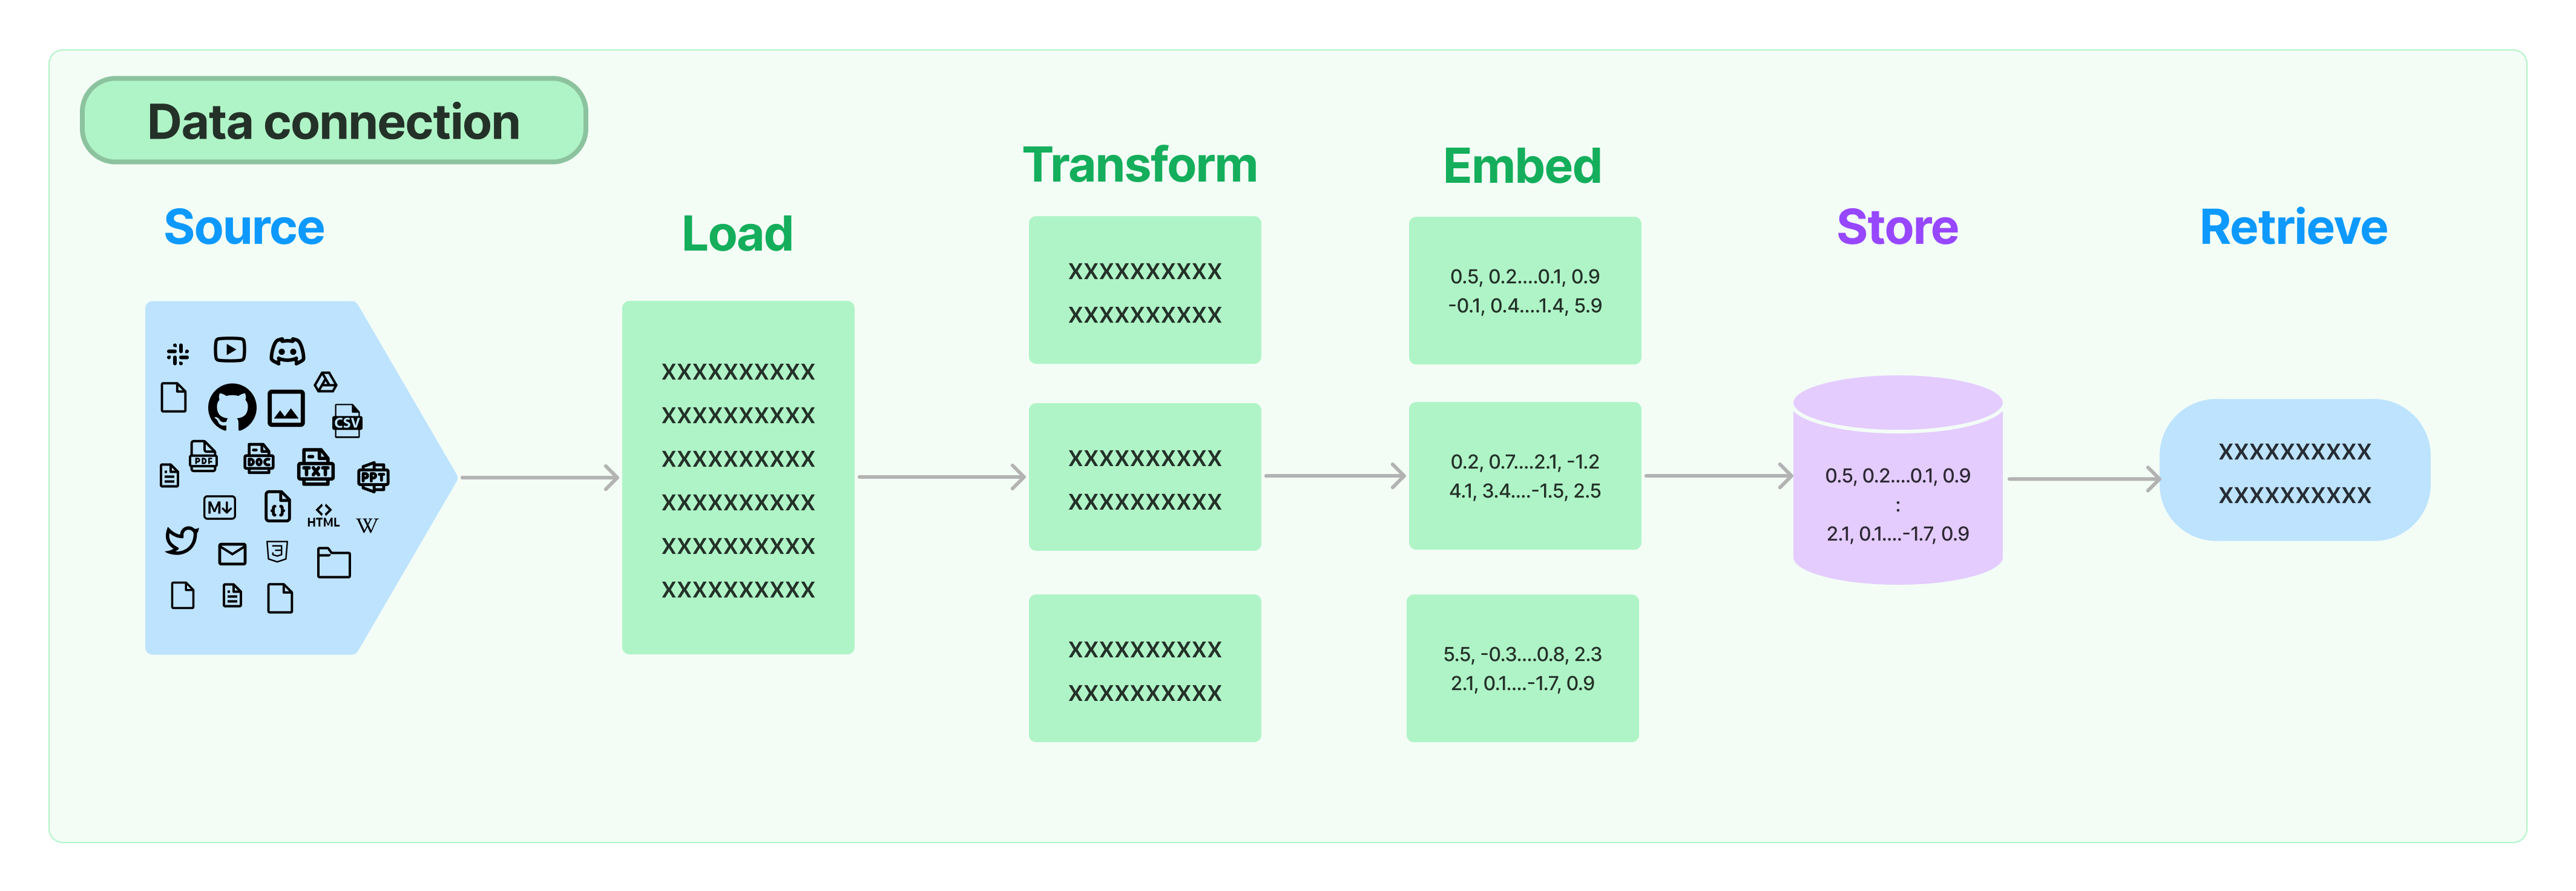

### **[Document Loaders](https://python.langchain.com/docs/modules/data_connection/document_loaders/)**


Document loaders provide an easy method to import data from different sources or formats as a DOcument, which contains the text content and the associated metadata.

Document Loaders load documents from different sources like HTML, PDF, text, etc., from various locations like cloud storage buckets and public websites. LangChain provides over 100 different document loaders as well as integrations with other major providers in the space, like AirByte and Unstructured. Refer to the official documentation for the complete list of supported [document loaders](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.document_loaders) in the API reference and the [official documentation](https://python.langchain.com/docs/integrations/document_loaders).

It should be noted that some document loaders require the associated libraries to be installed.


PDF Documents

Langchain can load and parse PDF documents using various pdf connectors. We will see the PyPDFLoader to load documents into an array of documents. The document loader requires the python package of `pypdf` to be installed.

Each document contains the page content and metadata with the associated page number.

An added advantage of using PyPDFLoader is that the documents can be retrieved with page numbers.


In [ ]:
# import the PyPDFLoader class from LangChain
!pip install langchain-community langchain-core
from langchain_community.document_loaders import PyPDFDirectoryLoader

# Read the insurance documents from directory
pdf_directory_loader = PyPDFDirectoryLoader(folder_path + 'policy_documents')

documents = pdf_directory_loader.load()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
# print details and first 100 lines from each docucment
for doc in documents:
    print(f"Source: {doc.metadata['source']}")
    print(f"Page Number: {doc.metadata['page']}")
    print(f"Content: {doc.page_content[:100]}...")  # Displaying the first 100 characters

Source: /content/drive/MyDrive/GenAI Revamp - 2025/GenAI for DS/policy_documents/HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
Page Number: 0
Content: HDFC Life Sanchay Plus (UIN – 101N134V19) – Appendix 9 (c) – Policy Bond 
A non-participating, non-l...
Source: /content/drive/MyDrive/GenAI Revamp - 2025/GenAI for DS/policy_documents/HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
Page Number: 1
Content: HDFC Life Sanchay Plus (UIN – 101N134V19) – Appendix 9 (c) – Policy Bond 
A non-participating, non-l...
Source: /content/drive/MyDrive/GenAI Revamp - 2025/GenAI for DS/policy_documents/HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-Policy-Document.pdf
Page Number: 2
Content: HDFC Life Sanchay Plus (UIN – 101N134V19) – Appendix 9 (c) – Policy Bond 
A non-participating, non-l...
Source: /content/drive/MyDrive/GenAI Revamp - 2025/GenAI for DS/policy_documents/HDFC-Life-Sanchay-Plus-Life-Long-Income-Option-101N134V19-

### **Document Transformers / Text Splitters**
Often times your document is too long (like a book) for your LLM. You need to split it up into chunks. Text splitters help with this.

There are many ways you could split your text into chunks, experiment with [different ones](https://python.langchain.com/en/latest/modules/indexes/text_splitters.html) to see which is best for you.

LangChain offers different text splitters for splitting the data such as:
* Split by Character
* Recursive Splitter
* Token Splitter

**Split by Character** - This is the simplest method. This splits based on characters (by default "\n\n") and measure chunk length by number of characters.
* How the text is split: by single character.
* How the chunk size is measured: by number of characters.

**Recursive Text Splitter** - This text splitter is the recommended one for generic text. It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. The default list is ["\n\n", "\n", " ", ""]. This has the effect of trying to keep all paragraphs (and then sentences, and then words) together as long as possible, as those would generically seem to be the strongest semantically related pieces of text.
* How the text is split: by list of characters.
* How the chunk size is measured: by number of characters.

**Split by tokens** - Language models have a token limit. You should not exceed the token limit. When you split your text into chunks it is therefore a good idea to count the number of tokens. There are many tokenizers. When you count tokens in your text you should use the same tokenizer as used in the language model.

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Initialize the RecursiveCharacterTextSplitter (customize chunk size and overlap as needed)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

splits = text_splitter.split_documents(documents)

In [ ]:
# print a sample chunk
print(splits[2])

page_content='the Policy to us for cancellation stating the reasons  thereof, within 30 days from the date of receipt of the Policy 
as your Policy is an electronic Policy / purchased through Distance Marketing mode. On receipt of your letter 
along with the original Policy (original Policy Document is not required for polic ies in dematerialised form), we 
shall arrange to refund the Premium paid by you, subject to deduction of the proportionate risk Premium for the 
period of cover and the expenses incurred by us for medical examination (if any) and stamp duty charges.>>  
 
Contacting us: 
The address for correspondence is specified below. To enable us to serve you better, you are requested to quote 
your Policy number in all future correspondence. In case you are keen to know more about our products and 
services, we would request you to talk to our Certified Financial Consultant (Insurance Agent) who has advised' metadata={'producer': 'Microsoft® Word 2013', 'creator': 'Microsoft®

In [ ]:
print ("Text Preview:") # Preview the split texts and the character count
print (splits[0].page_content,"-", len(splits[0].page_content), "\n")
print (splits[1].page_content,"-", len(splits[1].page_content), "\n")
print (splits[2].page_content,"-", len(splits[2].page_content), "\n")
print (splits[3].page_content,"-", len(splits[3].page_content), "\n")
print (splits[4].page_content,"-", len(splits[4].page_content), "\n")
print (splits[5].page_content,"-", len(splits[5].page_content), "\n")

Text Preview:
HDFC Life Sanchay Plus (UIN – 101N134V19) – Appendix 9 (c) – Policy Bond 
A non-participating, non-linked savings insurance plan 
 
 
 Page 1 of 27 
 
Part A 
<<01 January 2021>> 
<<Policyholder’s Name>>  
<<Policyholder’s Address>> 
<<Policyholder’s Contact Number>> 
 
Dear <<Policyholder’s Name>>,  
 
Sub: Your Policy no. <<>> 
We are glad to inform you that your proposal has been accepted and the HDFC Life Sanchay Plus Policy 
(“Policy”) being this Policy, has been issued. We have made every effort to design your Policy in a simple format. 
We have highlighted items of importance so that you may recognise them easily. 
Policy document: 
As an evidence of the insurance contract between HDFC Life Insurance Company Limited and you, the Policy is 
enclosed herewith. Please preserve this document safely and also inform your Nominees about the same. A copy 
of your proposal form submitted by you is enclosed for your information and record. 
 
Cancellation in the Free-Look Pe

### [Text Embedding Models](https://python.langchain.com/docs/modules/data_connection/text_embedding/)

The Embeddings class is a class designed for interfacing with text embedding models. LangChain provides support for most of the embedding model providers (OpenAI, Cohere) including sentence transformers library from Hugging Face.

Embeddings create a vector representation of a piece of text and supports all the operations such as similarity search, text comparison, sentiment analysis etc.

The base Embeddings class in LangChain provides two methods: one for embedding documents and one for embedding a query.

The first method takes as input multiple texts, while the second method returns the embedding representation for a single text.


In [ ]:
#!pip install -U class:'~langchain-openai'

#from class:'~langchain_openai' import OpenAIEmbeddings

# Import the OpenAI Embeddings class from LangChain
from langchain.embeddings import OpenAIEmbeddings
embeddings_model = OpenAIEmbeddings()

<ipython-input-16-c60b8f0a94d9>:7: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings_model = OpenAIEmbeddings()


In [ ]:
# doing a sample embedding of a random chunk, to check size
embeddings = embeddings_model.embed_documents([splits[0].page_content])
len(embeddings), len(embeddings[0])

(1, 1536)

In [ ]:
type(embeddings)

list

### Vector Stores

One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you.

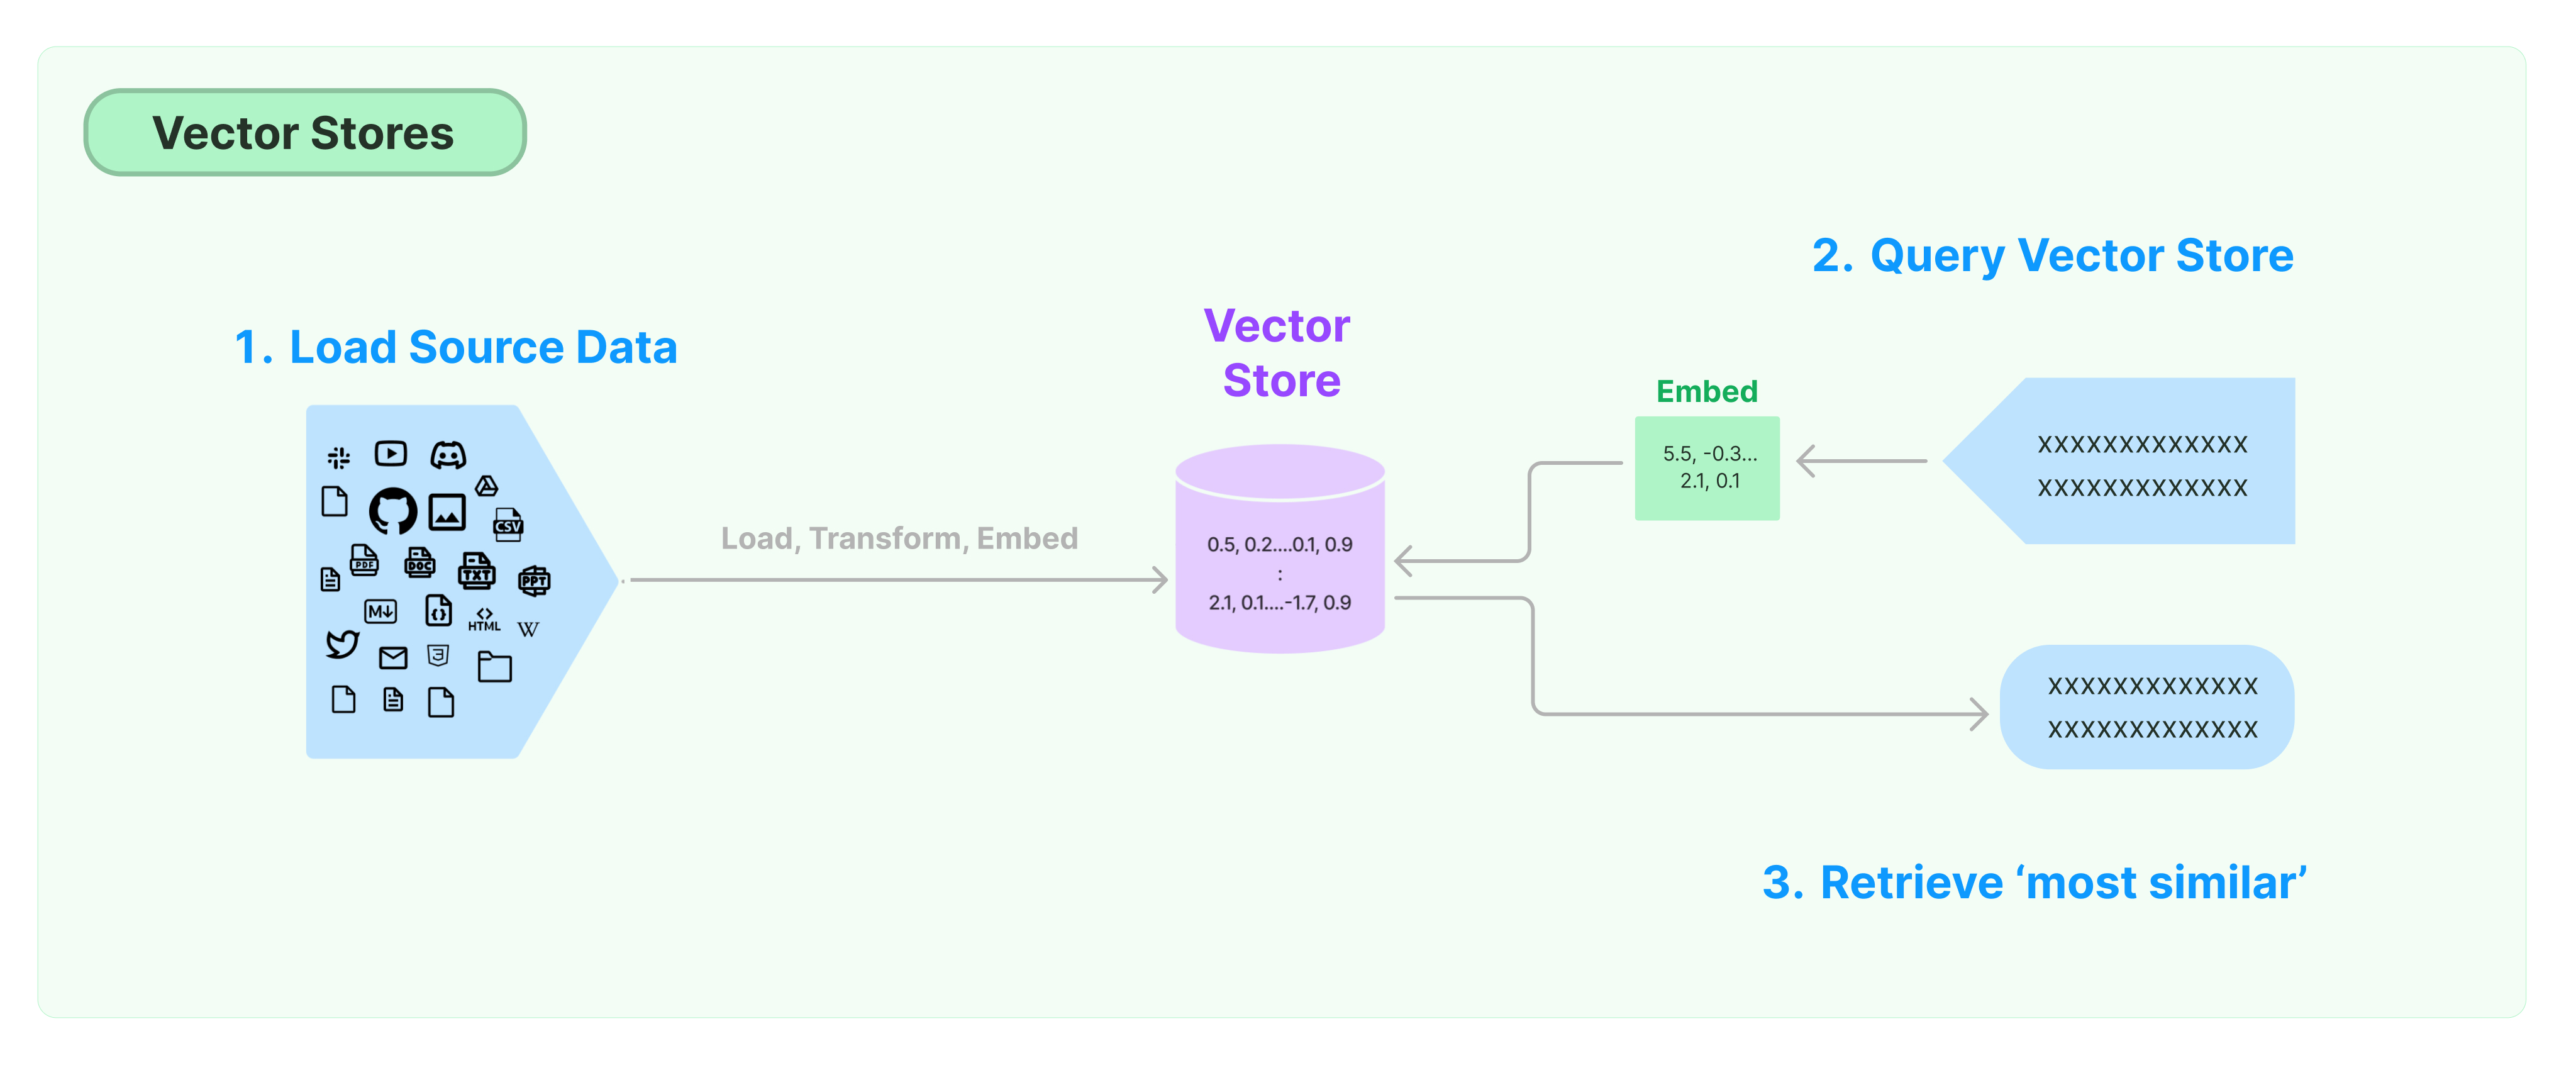

In [ ]:
from langchain.vectorstores import Chroma
# Initialize OpenAIEmbeddings
openai_embeddings = OpenAIEmbeddings()

In [ ]:
# creating a cache backed embeddings
from langchain.storage import InMemoryStore
from langchain.embeddings import CacheBackedEmbeddings

cache_store = InMemoryStore()
cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
    openai_embeddings,
    cache_store,
    namespace="embeddings_namespace"
)

In [ ]:
# Create a persistent ChromaDB instance with OpenAI embeddings
db = Chroma.from_documents(
    documents = splits,
    embedding = cached_embeddings,
    persist_directory="./chroma_persistence"  # Set a directory for persistent storage
)

Perform Similarity Search

In [ ]:
def similarity_search(query):
    return db.similarity_search(query)

docs =  similarity_search("what is the life insurance coverage for disability?")
print(docs[0])

page_content='Page 7 of 31 
 
Part C 
1. Benefits: 
 
(1) Benefits on Death or diagnosis of contingency covered –  
 
Plan Option Events Benefit 
Life Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured.  
Extra Life Option Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured. 
Accidental Death In event of the Scheme Member’s death due to 
Accident, an additional death benefit equal to the Sum 
Assured will be payable. 
This is in addition to the death benefit mentioned 
above  
Accelerated Critical Illness 
Option 
 
Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured. 
Diagnosis of a 
Critical Illness 
In the event of Scheme Member being diagnosed with 
any of the covered Critical Illnesses during the Policy 
Term, the benefit payable shall be the Sum Assured 
and the policy will terminate.' metadata={'creationdate': '2022-01-10T13:40:09+00:00

LangChain also support all major vector stores and databases such as FAISS, ElasticSearch, LanceDB, Milvus, Pinecone etc. Refer to the [API documentation](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.vectorstores) for the complete list.

### **Retrievers**
Retrievers provide Easy way to combine documents with language models.


A retriever is an interface that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them. Retriever stores data for it to be queried by a language model. It provides an interface that will return documents based on an unstructured query. Vector stores can be used as the backbone of a retriever, but there are other types of retrievers as well.



There are many different types of retrievers, the most widely supported is the VectoreStoreRetriever.

The [official documentation](https://python.langchain.com/docs/integrations/retrievers/) and [API reference](https://api.python.langchain.com/en/latest/api_reference.html#module-langchain.retrievers) contains a list of retriever integrations supported by LangChan.

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

# Initialize a document retriever using the existing vector storage (db).
# The retriever is configured to retrieve a top 20 documents with  mmr score more than 0.8 with cross encoding enabled

def get_retriever(topk):
    search_kwargs={"k": topk, "score_threshold": 0.8}
    retriever = db.as_retriever(search_type="mmr", search_kwargs=search_kwargs)

    # Initialize cross-encoder model
    cross_encoder = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-base")

    # Set up reranker
    reranker = CrossEncoderReranker(model=cross_encoder, top_n=20)
    return ContextualCompressionRetriever(base_compressor=reranker, base_retriever=retriever)



# Combine retriever and reranker
def get_topk_relevant_documents(query, topk):
    retriever = get_retriever(topk)
    relevant_docs = retriever.invoke(query)
    return relevant_docs

In [ ]:
retriever_docs = get_topk_relevant_documents("what is the life insurance coverage for disability?", 50)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

In [ ]:
#len(retriever_docs)
!pip show langchain

Name: langchain
Version: 0.3.21
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: langchain-core, langchain-text-splitters, langsmith, pydantic, PyYAML, requests, SQLAlchemy
Required-by: langchain-community


In [ ]:
# print one page content
retriever_docs[0]

Document(metadata={'creationdate': '2022-01-10T13:40:09+00:00', 'creator': 'PyPDF', 'moddate': '2022-01-20T07:02:14+00:00', 'page': 28, 'page_label': '29', 'producer': 'Microsoft: Print To PDF', 'source': '/content/drive/MyDrive/GenAI Revamp - 2025/GenAI for DS/policy_documents/HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf', 'title': 'HDFC Life Group Poorna Suraksha (101N137V02) - Policy Document', 'total_pages': 31}, page_content='three (3)of the following Activities of Daily Living either with or without the use of mechanical equipment, \nspecial devices or other aids and adaptations in use for disabled persons. For the purpose of this benefit, the \nword “permanent” shall mean beyond the scope of recovery with current medical knowledge and technology. \nThe following are excluded: \n\uf0b7 Spinal cord injury  \n15. Parkinson’s Disease - Unequivocal Diagnosis of Parkinson’s disease by a Registered Medical Practitioner \nwho is a neurologist where the condition: \n\uf

In [ ]:
# method for combining all relevant page content
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:277: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


# 4. Chains

Using an LLM in isolation is fine for simple applications, but more complex applications require chaining LLMs - either with each other or with other components.

LangChain provides Chains that can be used to combine multiple components together to create a single, coherent application.

For example, we can create a chain that takes user input, formats it with a PromptTemplate, and then passes the formatted response to an LLM. We can build more complex chains by combining multiple chains together, or by combining chains with other components.

The fundamental unit of Chains is a LLMChain object which takes an input and provides an output.

In [ ]:
# In LangChain, the rag-prompt is a prompt template designed for Retrieval-Augmented Generation (RAG) tasks,
# such as chat and question-answering applications. It facilitates the integration of external context into
# the language model's responses, enhancing the relevance and accuracy of the generated content.

# pulling rag prompt from LangChain hub
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:277: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


Let's now create a simple LLMChain that takes an input, formats it, and passes it to an LLM for processing. The basic components are PromptTemplate, input queries, an LLM, and optional output parsers.

In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

retriever = get_retriever(50)
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
# test a query
query = "what is the minimum age for doing a term insurance?"
rag_chain.invoke(query)

'The minimum age for doing a term insurance is 18 years.'

In [ ]:
# test a query
query = "Can a 100 year plus person do a term insurance?"
rag_chain.invoke(query)

'A person who is 100 years old or older may not be eligible for a term insurance policy due to age restrictions set by insurance companies. The insurer may request proof of age at any time, but the ability to obtain a life insurance policy at that age may be limited. It is advisable to check the specific terms and conditions of the insurance provider for accurate details on eligibility for term insurance at such an advanced age.'

In [ ]:
# test another query
query = "what is condition of deatht while not wearing Seat Belt?"
rag_chain.invoke(query)

'The condition of death while not wearing a seatbelt is not specifically mentioned in the retrieved context. Therefore, it is not possible to provide information on the exact condition of death in this scenario.'

In [ ]:
# test another query
query = "what is the life insurance coverage for disability?"
rag_chain.invoke(query)

"The life insurance coverage for disability includes coverage for Parkinson's Disease if the condition cannot be controlled with medication, shows signs of progressive impairment, and the individual is unable to perform at least three Activities of Daily Living. Only idiopathic Parkinson’s Disease is covered, and drug-induced or toxic causes are excluded. The coverage is subject to specific criteria and assessments to determine eligibility for benefits."

In [ ]:
# test another query
query = "what is criteria for HDFC group insurance?"
rag_chain.invoke(query)

'The criteria for HDFC group insurance include being an eligible member, adherence to the terms and conditions of the policy, and following the endorsements made over time. The insurance cover is for HDFC Life Group Term Life, a non-linked, non-participating group life insurance policy. Specific exclusions apply, such as pre-existing conditions, suicidal attempts, and certain criminal acts.'

In [ ]:
# test another query
query = "what are the benifits of HDFC Sampoorna-Jeevan insurance?"
rag_chain.invoke(query)

"The benefits of HDFC Sampoorna-Jeevan insurance include participation in the Company's profits, guaranteed benefits options, and non-guaranteed bonuses. The Policy allows for flexibility in choosing the maturity age variant and benefit payment options. Additionally, the Policy provides financial security and peace of mind to the Policyholder and their beneficiaries."

In [ ]:
# test another query
query = "what are HDFC Life Sanchay Plus Life Long Income Option ?"
rag_chain.invoke(query)

'HDFC Life Sanchay Plus Life Long Income Option is a non-participating, non-linked savings insurance plan that provides a Guaranteed Income on Maturity starting from the policy term until the individual reaches age 99, in arrears on payment of all due premiums. The policy terminates at the end of the Payout Period by returning the Total Premiums paid. The policy is subject to modifications, amendments, and re-enactments of insurance laws, rules, regulations, guidelines, and circulars as per applicable regulations.'